# Documento de la entrega de Python
#### **Autor:** Xuban Barberena Apezetxea
#### **Asignatura:** Software matemático y estadístico
#### **Fecha:** 05/11/2023

<br />

Este documento tiene como objetvo ilustrar el uso de las funciones implementadas.

Para ello, se mostrará punto por punto las funciones implementadas tal y como se menciona en el enunciado. Además, se añadirán casos de uso de dichas funciones para comprobar el correcto funcionamiento.  

<br />

Para empezar, hay que cargar las librerias necesarias:


In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import math

<br />

A continuación, se definen los datos que se utilizarán como ejemplo para ejecutar las funcionen en este documento.

Se ha definido una lista y un dataframe que contienene columnas de diversos tipos. De este modo, se comprobará que as funciones cumplen con los requisitos de los tipos de datos que puedan procesar.

In [250]:
# Lista
x = [1.6, 1, 5.1, 6, 3.7]

# Dataframe
data = {
    'Col1': [1.0, 1.0, 2.2, 3.1, 5.5],
    'Col2': [1, 0, 1, 2, 3],
    'Col3': [0, 0, 1, 2, 2],
    'Col4': [1.0, 2.2, 2.2, 5.5, 1.0],
    'Col5': pd.Categorical([2, 2, 3.1, 3.1, 3.1]),
    'Col6': pd.Categorical([3, 2, 2, 4, 5]),
    'Col7': pd.Categorical(['Blanco', 'Negro', 'Negro', 'Blanco','Rojo']),
    'Col8': pd.Categorical(['Rojo', 'Verde', 'Azul', 'Blanco', 'Blanco']),
    'Col9': ['a', 'b', 'c', 'd', 'e'],
    'Col10': [True, False, True, False, True]
}
df = pd.DataFrame(data)

<br />

A continuación, se comienza detallando cada ejercicio implementado apartado por apartado:

# <u>**Discretización**</u>

El objetivo de este apartado ha sido implementar los 2 diferentes algoritmos de discretización: Equal Width (igual anchura) y Equal Frequency (igual frecuencia).

Como parámetro de entrada será una lista o un dataframe y el número de intervalos. De este modo, se devuelve la discretización y los puntos de corte.

<br />

### - **Equal Width:**
El objetivo es discretizar una lista o un Dataframe numérico haciendo uso del algoritmo Equal Width para un número de intervalos establecido.

Se han creado dos funciones:
* <u>algoritmo_discretizeEW</u>: función auxiliar donde se implementa el algoritmo de discretización.
* <u>discretizeEW</u>: función principal que comprueba si el argumento de entrada es una lista o un dataframe y llama a la función auxiliar. En caso de que reciba un dataframe, se hace uso de la función apply() de pandas para procesar cada columna.

In [251]:
def discretizeEW(x, num_bins):
  """
    Discretiza una lista o un DataFrame utilizando el algoritmo Equal Width (igual anchura).

    Utiliza la función algoritmo_discretizeEW() del archivo utils.py para aplicar el algoritmo.
    En esta función se comprueba de que tipo es el argumento recibido para actuar de una forma u otra.
    En cualuier caso, filtrá las variables para escoger solo las numéricas.

    Args:
    x (list or DataFrame): La lista o DataFrame que se va a discretizar.
    num_bins (int): El número intervalos en los que se discretizará.

    Returns:
    Depende de la entrada si es lista o dataframe la salida se guardará en estructuras de datos distintos:

      - Si la entrada es una lista, devuelve una tupla con la discretizacion en forma categorica y la lista con los
                                    puntos de corte.

      - Si la entrada es un dataframe: devuelve un dataframe con los resultados de cada columna. La primera fila muestra
                                      la discretizacion y la segunda los puntos de corte.

    """

  if isinstance(x, list): # si es atributo en forma de lista
    es_numerico = all(isinstance(valor, (int, float)) for valor in x)
    if es_numerico:
      x_discretized, cut_points = algoritmo_discretizeEW(x, num_bins)

      return x_discretized, cut_points

  elif isinstance(x, pd.DataFrame): # si es dataframe
    x = x.select_dtypes(include=['int', 'float']) # numerico

    return x.apply(algoritmo_discretizeEW, num_bins=num_bins)



def algoritmo_discretizeEW(x, num_bins):
  """
    Aplica el algoritmo Equal Width (igual anchura) para obtener los puntos de corte y así
    poder discretizar una lista o columna numérica.

    Args:
    x (list o Series): La columna numérica que se va a discretizar.
    num_bins (int): El número intervalos en los que se discretizará.

    Returns:
    pd.Categorical: Una columna categórica que representa la columna discretizada.
    list: Una lista de puntos de corte utilizados para discretizar la columna.
  """

  # Empezar aplicando el algoritmo equal width para determinar los puntos de corte
  minv, maxv = min(x), max(x)
  interv = (maxv - minv) / num_bins
  cut_points = [minv + i*interv for i in range(1, num_bins)]

  # Discretizar tomando cada valor de x para mirar en que intervalo cae
  x_discretized = []
  for val in x:
    for i, punto in enumerate(cut_points):
          if val <= punto:
            x_discretized.append(f"I{i + 1}") # Para devolver estilo: ["I3", "I2", "I1"]
            break # Pasar a analizar la siguente

          if i == len(cut_points) - 1: # Si ha llegado hasta aqui es la última, por lo que está fuera
            x_discretized.append(f"I{num_bins}")

  return(pd.Categorical(x_discretized), cut_points)

### <u>Caso de uso:</u> Equal Width
Se hará la prueba en los dos casos: con una lista y un dataframe.

En el caso del dataframe, se puede ver que solo se escogen las columnas numéricas. Como de ha mencionado en la documentación de las funciones, el resultado devuelve un dataframe, donde la primera fila muestra la discretizacion y la segunda fila los puntos de corte.

In [252]:
# Número de intervalos
num_bins = 3

# Lista
res = discretizeEW(x, num_bins)
print("**Equal Width**")
print("--------------------")
print(" -Discretizacion:", res[0])
print(" -Puntos de corte:", res[1])

# Dataframe
res = discretizeEW(df, num_bins)
print("\n\n**Equal Width**")
print("--------------------")
display(res)

**Equal Width**
--------------------
 -Discretizacion: ['I1', 'I1', 'I3', 'I3', 'I2']
Categories (3, object): ['I1', 'I2', 'I3']
 -Puntos de corte: [2.666666666666667, 4.333333333333334]


**Equal Width**
--------------------


,Col1,Col2,Col3,Col4
0,"['I1', 'I1', 'I1', 'I2', 'I3'] Categories (3, ...","['I1', 'I1', 'I1', 'I2', 'I3'] Categories (3, ...","['I1', 'I1', 'I2', 'I3', 'I3'] Categories (3, ...","['I1', 'I1', 'I1', 'I3', 'I1'] Categories (2, ..."
1,"[2.5, 4.0]","[1.0, 2.0]","[0.6666666666666666, 1.3333333333333333]","[2.5, 4.0]"


### - **Equal Frequency:**
El objetivo es discretizar una lista o un Dataframe numérico haciendo uso del algoritmo Equal Frequency para un número de intervalos establecido.

Se han creado dos funciones, que son equivalentes a lo explicado en Equal Width.

In [254]:
def discretizeEF(x, num_bins):
  """
    Discretiza una lista o un DataFrame utilizando el algoritmo Equal Frequency (igual frecuencia).

    Utiliza la función algoritmo_discretizeEF() del archivo utils.py para aplicar el algoritmo.
    En esta función se comprueba de que tipo es el argumento recibido para actuar de una forma u otra.
    En cualuier caso, filtrá las variables para escoger solo las numéricas.

    Args:
    x (list or DataFrame): La lista o DataFrame que se va a discretizar.
    num_bins (int): El número intervalos en los que se discretizará.

    Returns:
    Depende de la entrada si es lista o dataframe la salida se guardara en estructuras de datos distintos:

      - Si la entrada es una lista, devuelve una tupla con la discretizacion en forma categorica y la lista con los
                                    puntos de corte.

      - Si la entrada es un dataframe: devuelve un dataframe con los resultados de cada columna. La primera fila muestra
                                      la discretizacion y la segunda los puntos de corte.

    """

  if isinstance(x, list): # si es atributo en forma de lista
    es_numerico = all(isinstance(valor, (int, float)) for valor in x)
    if es_numerico:
      x_discretized, cut_points = algoritmo_discretizeEF(x, num_bins)

      return x_discretized, cut_points

  elif isinstance(x, pd.DataFrame): # si es dataframe
    x = x.select_dtypes(include=['int', 'float']) # numerico

    return x.apply(algoritmo_discretizeEF, num_bins=num_bins)


def algoritmo_discretizeEF(x, num_bins):
  """
    Aplica el algoritmo Equal Frequency (igual frecuencia) para obtener los puntos de corte y así
    poder discretizar una lista o columna numérica.

    Args:
    x (list o Series): La columna numérica que se va a discretizar.
    num_bins (int): El número intervalos en los que se discretizará.

    Returns:
    pd.Categorical: Una columna categórica que representa la columna discretizada.
    list: Una lista de puntos de corte utilizados para discretizar la columna.
  """

  # Empezar aplicando el algoritmo equal Frequency para determinar los puntos de corte
  interval_size = len(x) // num_bins   # Calcular el tamaño de cada intervalo
  sorted_x = sorted(x)  # Ordenar la lista de entrada
  cut_points = [sorted_x[i * interval_size] for i in range(1, num_bins)] # Sacar los puntos de corte

  # Discretizar tomando cada valor de x para mirar en que intervalo cae
  x_discretized = []
  for val in x:
    for i, punto in enumerate(cut_points):
          if val <= punto:
            x_discretized.append(f"I{i + 1}") # Para devolver estilo: ["I3", "I2", "I1"]
            break # pasar a analizar la siguente

          if i == len(cut_points) - 1: # si ha llegado hasta aqui es la ultima, por lo que esta fuera
            x_discretized.append(f"I{num_bins}")

  return(pd.Categorical(x_discretized), cut_points)

### <u>Caso de uso:</u> Equal Frequency
Se hará la prueba en los dos casos: con una lista y un dataframe (el resultado del dataframe es equivalente a lo que se ha mencionado en Equal Width).

In [255]:
# Número de intervalos
num_bins = 3

# Lista
res = discretizeEF(x, num_bins)
print("**Equal Frequency**")
print("--------------------")
print(" -Discretizacion:", res[0])
print(" -Puntos de corte:", res[1])

# Dataframe
res = discretizeEF(df, num_bins)
print("\n\n**Equal Frequency**")
print("--------------------")
display(res)

**Equal Frequency**
--------------------
 -Discretizacion: ['I1', 'I1', 'I3', 'I3', 'I2']
Categories (3, object): ['I1', 'I2', 'I3']
 -Puntos de corte: [1.6, 3.7]


**Equal Frequency**
--------------------


,Col1,Col2,Col3,Col4
0,"['I1', 'I1', 'I2', 'I3', 'I3'] Categories (3, ...","['I1', 'I1', 'I1', 'I3', 'I3'] Categories (2, ...","['I1', 'I1', 'I2', 'I3', 'I3'] Categories (3, ...","['I1', 'I2', 'I2', 'I3', 'I1'] Categories (3, ..."
1,"[1.0, 2.2]","[1, 1]","[0, 1]","[1.0, 2.2]"


<br />

# <u>**Métricas**</u>   
El objetivo de este apartado es calcular métricas para los atributos de un dataset. En concreto, la varianza y AUC para variables continuas y entropía para las discretas.

### - **Varianza:**
Se han credo dos funciones:

* <u>varianza_dataframe()</u>: funcion principal que selecciona las variables continuas y utiliza después la función apply() de pandas para procesar cada columna haciendo uso de la funcion auxiliar varianza() para realizar los cálculos.

* <u>varianza()</u>: función auxiliar que recibe una columna de un dataframe y devuelve la varianza de esta.

In [257]:
def varianza_dataframe(df):
  """
    Calcula la varianza de las columnas continuas de un DataFrame.

    Utiliza la función varianza() del archivo utils.py para calcular la varianza para cada columna.

    Args:
    df (pd.DataFrame): DataFrame de pandas que contiene columnas con cualquier tipo de datos.
                       La función filtrara el dataframe para escoger solo las columnas continuas.

    Returns:
    pd.Series: Serie de pandas que contiene los valores de entropía para cada columna continua del DataFrame.
               Al hacer uso de la función df.apply() este devuelve el resultado en la estructura Serie de pandas.
               Los índices de la Serie corresponden a los nombres de las columnas del DataFrame original.
  """

  df = df.select_dtypes(include=['float'])
  # es_continua = all(isinstance(valor, int) for valor in df[nombre_columna]) # Otra forma para lo mismo

  return df.apply(varianza)


def varianza(col):
  """
    Calcula la varianza de una lista cuyos elementos sean continuos. Originalmente esta implementado para utilizar con columnas
    de un dataframe, pero se puede utilizar con cualquier lista.

    Esta pensado para usar esta funcion con apply() de pandas en la función varianza_dataframe() de main_funcs.py,
    por eso recibe Serie de pandas. Pero tambien puede recbir una lista de enteros como entrada.

    Args:
    col (list o Series): Lista de números para los cuales se calculará la varianza.

    Returns:
    float: Valor de la varianza.
  """
  if (len(col) != 0):
    media = sum(col) / len(col) # Calcular la media
    return sum((x - media) ** 2 for x in col) / len(col) # Aplicar la formula de la varianza

### <u>Caso de uso:</u> Varianza

Se ve que de entre todas las columnas selecciona correctamente solo las continuas. Como se ha mencionado, la estructura que devuelve es un Series de pandas, donde la columna representa el valor de la varianza y las filas indican a que columna del dataframe original pertenece.

In [258]:
res = varianza_dataframe(df)
print("Varianzas obtenidas:")
print("--------------------")
for i in range(len(res)):
  print(res.index[i]," = ", round(res[i], 3))

Varianzas obtenidas:
--------------------
Col1  =  2.786
Col4  =  2.722


### - **Entropia:**
Se han credo dos funciones que son equivalentes a lo mencionado en la varianza.

In [259]:
def entropia_dataframe(df):
  """
    Calcula la entropía de las columnas enteras de un DataFrame.
    Utiliza la función entropia() del archivo utils.py para calcular la entropia para cada columna.

    Args:
    df (pd.DataFrame): DataFrame de pandas que contiene columnas con cualquier tipo de datos.
                       La función filtrara el dataframe para escoger solo las columnas discretas.

    Returns:
    pd.Series: Serie de pandas que contiene los valores de entropía para cada columna discreta del DataFrame.
               Al hacer uso de la función df.apply() este devuelve el resultado en la estructura Serie de pandas.
               Los índices de la Serie corresponden a los nombres de las columnas del DataFrame original.
  """

  df = df.select_dtypes(include=['int'])

  return df.apply(entropia)


def entropia(x):
    """
    Calcula la entropía de una lista cuyos elementos sean discretos.
    Utiliza la fórmula: H(X) = -sum(p(x) * log2(p(x))),  donde p(x) son las probabilidades de cada valor en el conjunto de datos

    Esta pensado para usar esta funcion con apply() de pandas en la función entropia_dataframe() de main_funcs.py,
    por eso recibe Serie de pandas. Pero tambien puede recbir una lista de enteros como entrada.

    Args:
    x (list o Series): Lista de valores para los cuales se calculará la entropía.

    Returns:
    float: Valor de entropía del conjunto de datos si se cumple la condición de que los valores sean discretos.
    """

    # Empezar contando las apariciones de cada elemento
    cont_val = {}
    for val in x:
        cont_val[val] = cont_val.get(val, 0) + 1

    # Calcula las Probabilidades de cada valor
    probs = [cont / len(x) for cont in cont_val.values()]

    # Calcular la entropía dada las probabilidades
    return -sum(p * math.log2(p) if p != 0 else 0 for p in probs)

### <u>Caso de uso:</u> Entropia

Lo mismo que se ha comentado en el caso de uso de Varianza.

In [260]:
res = entropia_dataframe(df)
print("Entropias obtenidas:")
print("--------------------")
for i in range(len(res)):
  print(res.index[i]," = ", round(res[i], 3))

Entropias obtenidas:
--------------------
Col2  =  1.922
Col3  =  1.522


### - **Curva AUC-ROC:**
Aquí también se ha creado una función principal y una auxiliar, pero hay una diferencia con las dos anteriores.

Para obtener el AUC hace falta unas etiquetas para cada variable. Para simplificar el proceso, se ha decidido que las etiquetas esten en la última columna del dataframe y todas las continuas utilizarán la misma etiqueta (así se ha definido el dataframe al principio del documento).

Por lo tanto, en la función principal roc_dataframe() se selecciona la última columna para pasar juanto a cada columna a la función auxiliar get_roc().

In [ ]:
def roc_dataframe(df):
  """
    Calcula las curvas ROC para las columnas continuas de un DataFrame utilizando las etiquetas de la última columna
    como valores de clase.
    Utiliza la función get_roc() del archivo utils.py para calcular para cada columna el área debajo de la curva ROC y las listas
    FPR y TPR.

    Args:
    df (DataFrame): El DataFrame que contiene las columnas de cualquier tipo y la última columna debe de ser las etiquetas.
                    La función filtrara el dataframe para escoger solo las columnas continuas.

    Returns:
    pd.Series: Serie de pandas que contiene los valores del área debajo de la curva, la lista TPR y FPR.
               Al hacer uso de la función df.apply() este devuelve el resultado en la estructura Serie de pandas.

    """

  col_etiqueta = df.iloc[:, -1] # Guardar los labels
  df = df.select_dtypes(include=['float']) # Seleccionar las columnas continuas

  return df.apply(get_roc, etiquetas=col_etiqueta)


def get_roc(col, etiquetas):
  """
    Calcula la curva ROC para una columna continua y las etiquetas de clase proporcionadas.
    Esta pensado para usar esta funcion con apply() de pandas en la función roc_dataframe() de main_funcs.py,
    por eso recibe Serie de pandas.

    Args:
    col (Series): La columna continua para la cual se calculará la curva ROC.
    etiquetas (Series): Las etiquetas de clase correspondientes a la columna continua.

    Returns:
    float: El área bajo la curva ROC (AUC).
    list: Una lista de las tasas de verdaderos positivos (TPR) para cada punto de la curva ROC.
    list: Una lista de las tasas de falsos positivos (FPR) para cada punto de la curva ROC.
    """

  # Ordenar el DataFrame
  col = col.sort_values()

  # Inicializar listas para almacenar TPR y FPR
  tpr_list = []
  fpr_list = []

  # Determinar los puntos de la curva ROC (es decir, todos los pares TPR y FPR para cada posible valor de corte)
  for valor_corte in col:
    # Calcular TP, FP, TN, FN para el valor de corte dado
    TP = ( (col >= valor_corte) & (etiquetas==True) ).sum()
    FP = ( (col >= valor_corte) & (etiquetas==False) ).sum()
    TN = ( (col < valor_corte)  & (etiquetas==False) ).sum()
    FN = ( (col < valor_corte)  & (etiquetas==True) ).sum()

    # Calcular TPR y FPR para el valor de corte actual
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)

    # Guardar TPR y FPR del valor de corte en la lista
    tpr_list.append(TPR)
    fpr_list.append(FPR)

  # Calcular el área bajo la curva ROC (AUC) usando la regla del trapecio
  auc = 0
  for i in range(1, len(tpr_list)):
      auc += 0.5 * (fpr_list[i] - fpr_list[i - 1]) * (tpr_list[i] + tpr_list[i - 1])

  return auc, tpr_list, fpr_list

### <u>Caso de uso:</u> Curva AUC-ROC

En este caso, tal y como se comenta en la documentación, el resultado es un dataframe donde para cada columna procesada la primera fila indica el área debajo de la curva, la segunda fila la lista TPR, y la tercera fila la lista FPR.

En este caso también se ve de entre todas las columnas solo escoge las continuas.

In [261]:
res = roc_dataframe(df)
print("Curva AUC-ROC:")
print("--------------------")
for i in range(len(res.columns)):
  print("   -> ", res.columns[i])
  print("Área"," = ", round(res[res.columns[i]][0], 3))
  print("TPR"," = ", res[res.columns[i]][1])
  print("FPR"," = ", res[res.columns[i]][2])
  print()

Curva AUC-ROC:
--------------------
   ->  Col1
Área  =  -0.583
TPR  =  [1.0, 1.0, 0.6666666666666666, 0.3333333333333333, 0.3333333333333333]
FPR  =  [1.0, 1.0, 0.5, 0.5, 0.0]

   ->  Col4
Área  =  -0.083
TPR  =  [1.0, 1.0, 0.3333333333333333, 0.3333333333333333, 0.0]
FPR  =  [1.0, 1.0, 1.0, 1.0, 0.5]



# <u>**Normalización y estandarización**</u>  
Normalizacion y estandarización de variables tanto de manera individual como para el dataset completo. Solo se han procesado las variables que son numéricas, es decir, las booleanas y categoricas no se procesarán.

En los dos casos se ha creado dos funciones:
  * **normalizar()** y **estandarizar()**: funciones principales que se encargan de comprobar si las variables son numéricas para después llamar a la funciones auxiliares para realizar el cálculo. En caso de que a entrada sea un dataframe, se utiliza la función apply() de pandas para procesar cada columna.

  * **aux_normalizar()** y **aux_estandariza()**: funciones auxiliares donde se realiza el cálculo para una variable ys numérica pasado como argumento.

<br />

### - **Normalización:**

In [262]:
def normalizar(x):
    """
    Normaliza una lista de valores numéricos o un DataFrame con columnas numéricas en el rango [0, 1].
    Utiliza la función aux_normalizar() del archivo utils.py para normalizar la lista o las columnas del dataframe.

    Args:
    x (list or pd.DataFrame): Lista de valores numéricos o DataFrame que se va a normalizar.

    Returns:
    list or pd.DataFrame: Lista normalizada si se proporciona una lista si es numérico, sino devuelve la propia lista.
                          DataFrame con las columnas numéricas normalizadas si se proporciona un DataFrame.
                          Si el tipo de entrada no es compatible, devuelve un mensaje de error.
    """

    if isinstance(x, list):
        es_numerico = all(isinstance(valor, (int, float)) for valor in x) # Verificar si todos los elementos son numéricos
        if es_numerico:
          return aux_normalizar(x)
        else:
          return x

    elif isinstance(x, pd.DataFrame):
        df = x.copy() # Crear copia para que no modifica el dataframe original
        sel = df.select_dtypes(include=['int', 'float']).columns # Seleccionar solo las columnas numéricas
        df[sel] = df[sel].apply(aux_normalizar)
        return df

    else:
        return "No es ni una lista ni un DataFrame"


def aux_normalizar(x):
  """
    Normaliza una lista de valores numéricos en el rango [0, 1].
    Para normalizar los valores se utiliza la fórmula: (val - min_valor) / (max_valor - min_valor)

    Args:
    x (list o Series): Lista de valores numéricos que se van a normalizar.

    Returns:
    list: Lista normalizada de valores en el rango [0, 1].
          Si (max_valor - min_valor) == 0, devuelve la lista original para no dividir por 0.
  """

  min_valor, max_valor = min(x), max(x) # Calcular el valor mínimo y máximo en la lista
  if (max_valor - min_valor) != 0:
    return [(val - min_valor) / (max_valor - min_valor) for val in x] # Devolver la lista normalizada
  else:
    return x

### <u>Caso de uso:</u> Normalización

Se aprecia que la lista normaliza correctamente y como devuelve el dataframe original pero con solo las columnas numéricas normalizadas (Col1-Col4).

In [263]:
# Lista
res_list = normalizar(x)
print("Lista Normalizada:")
print("-----------------------")
print(res_list)

# Dataframe
print(display)
res_df = normalizar(df)
print("\n\nDataframe Normalizado:")
print("------------------------")
display(res_df)

Lista Normalizada:
-----------------------
[0.12000000000000002, 0.0, 0.82, 1.0, 0.54]
<function display at 0x78bc342c09d0>


Dataframe Normalizado:
------------------------


,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10
0,0.000000,0.333333,0.0,0.000000,2.0,3,Blanco,Rojo,a,True
1,0.000000,0.000000,0.0,0.266667,2.0,2,Negro,Verde,b,False
2,0.266667,0.333333,0.5,0.266667,3.1,2,Negro,Azul,c,True
3,0.466667,0.666667,1.0,1.000000,3.1,4,Blanco,Blanco,d,False
4,1.000000,1.000000,1.0,0.000000,3.1,5,Rojo,Blanco,e,True


### - **Estandarización:**

In [264]:
def estandarizar(x):
    """
    Estandariza una lista de valores numéricos o un DataFrame con columnas numéricas para que tengan media 0 y desviación estándar 1.
    Utiliza la función aux_estandarizar() del archivo utils.py para estandarizar la lista o las columnas del dataframe.

    Args:
    x (list or pd.DataFrame): Lista de valores numéricos o DataFrame que se va a estandarizar.

    Returns:
    list or pd.DataFrame: Lista estandarizada si se proporciona una lista si es numérico, sino devuelve la propia lista.
                          DataFrame con las columnas numéricas estandarizadas si se proporciona un DataFrame.
                          Si el tipo de entrada no es compatible, devuelve un mensaje de error.
    """

    if isinstance(x, list):
        es_numerico = all(isinstance(valor, (int, float)) for valor in x) # Verificar si todos los elementos son numéricos
        if es_numerico:
          return aux_estandarizar(x)
        else:
          return x

    elif isinstance(x, pd.DataFrame):
        df = x.copy() # Crear copia para que no modifica el dataframe original
        sel = df.select_dtypes(include=['int', 'float']).columns # Seleccionar solo las columnas numéricas
        df[sel] = df[sel].apply(aux_estandarizar)
        return df

    else:
        return "No es ni una lista ni un DataFrame"


def aux_estandarizar(x):
  """
    Estandariza una lista de valores numéricos para que tengan media 0 y desviación estándar 1.
    Para estandarizar se ha utilizado la formula:  (val - media) / des_estandar

    Args:
    x (list o Series): Lista de valores numéricos que se van a estandarizar.

    Returns:
    list: Lista estandarizada de valores con media 0 y desviación estándar 1.
          Si des_estandar==0, devuelve la lista original para no dividir por 0.
  """

  media = sum(x) / len(x)
  des_estandar = (sum((val - media) ** 2 for val in x) / len(x)) ** 0.5
  if des_estandar != 0:
    return[(val - media) / des_estandar for val in x]
  else:
    return x


### <u>Caso de uso:</u> Estandarización

Se aprecia que la lista estandariza correctamente y como devuelve el dataframe original pero con solo las columnas numéricas estandarizadas (Col1-Col4).

In [265]:
# Lista
res_list = estandarizar(x)
print("Lista Estandarizada:")
print("-----------------------")
print(res_list)

# Dataframe
print(display)
res_df = estandarizar(df)
print("\n\nDataframe Estandarizado:")
print("------------------------")
display(res_df)

Lista Estandarizada:
-----------------------
[-0.97191698274002, -1.2821032538272608, 0.8375029319355495, 1.3027823385664106, 0.11373496606532187]
<function display at 0x78bc342c09d0>


Dataframe Estandarizado:
------------------------


,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10
0,-0.934551,-0.392232,-1.118034,-0.836502,2.0,3,Blanco,Rojo,a,True
1,-0.934551,-1.372813,-1.118034,-0.109109,2.0,2,Negro,Verde,b,False
2,-0.215666,-0.392232,0.000000,-0.109109,3.1,2,Negro,Azul,c,True
3,0.323498,0.588348,1.118034,1.891222,3.1,4,Blanco,Blanco,d,False
4,1.761269,1.568929,1.118034,-0.836502,3.1,5,Rojo,Blanco,e,True


<br/>

# <u>**Filtrado de variables**</u>  
Filtrado de variables en base a las métricas implementadas. Es decir, partiendo de un dataframe, obtener uno nuevo donde todas las variables cumplan los requisitos indicado.

En este caso, se ha decidido escoger las variables que superen un umbral establecido. Por otro lado, las funciones definidas para poder aplicar el filtrado son la varianza y entropia. Sin embargo, en la documentación de la función de filtrado se detalla como incluir mas métricas de forma sencilla.

In [266]:
def aplicar_filtrado(nombre_func, df, umbral):
    """
    Aplica un filtrado a un DataFrame utilizando una función para calcular una métrica específica y un umbral.
    De este modo, dado un dataframe solo se escogen las columnas que SUPEREN el umbral establecido para la función
    indicada.

    Las funciones disponibles estan establecdos en el diccionario lista_funciones, donde como key se indica la metrica
    que se desea y como valor a la funcion que lo calcula. Por ahora solo se han añadido las metricas varianza y entropia,
    pero si se quiere añadir otras solo hay que indicar en el diccionario.

    Parameters:
    nombre_func (str): Nombre de la función a aplicar. Las funciones válidas son 'varianza' y 'entropia'.
    df (DataFrame): El DataFrame al cual se le aplicará el filtrado.
    umbral (float): El umbral para filtrar los resultados de la función.

    Returns:
    DataFrame: Un nuevo DataFrame que contiene solo las columnas del DataFrame original para las cuales
               el resultado de la función es mayor que el umbral (además de las columnas que no son compatibles con la metrica indicada).
               Si el nombre de la función no es válido, devuelve un mensaje indicando que la función no es válida.
    """

    # Mapeo de nombres de funciones a funciones reales
    lista_funciones = {
        'varianza': varianza_dataframe,
        'entropia': entropia_dataframe
    }

    # Verificar si la función existe en el diccionario
    if nombre_func in lista_funciones:
      df_nuevo = pd.DataFrame()
      res = lista_funciones[nombre_func](df) # Llamada funcion pasando el dataframe
      for i in range(len(res)):
        if res[i] > umbral:
          df_nuevo[res.index[i]] = df[res.index[i]]

      return df_nuevo

    else:
        return "Función no válida"


### <u>Caso de uso:</u> Filtrado de variables
Se han hecho la prueba con la dos métricas establecidas, y se puede ver como solo escoge aquellas variables que cumplan con los requisitos de la mñetrica definida y superen el umbral.

In [267]:
# Escoger métrica
# Opciones: varianza, entropia
funcion_nombre = 'entropia'

# Definir umbral
umbral = 1.6

# Llamada
res = aplicar_filtrado(funcion_nombre, df, umbral)
print("Resultado del filtrado:")
print("-----------------------")
print(" - Métrica: ", funcion_nombre)
print(" - Umbral: ", umbral)
display(res)

# -------------------

funcion_nombre = 'varianza'
umbral = 2.75

# Llamada
res = aplicar_filtrado(funcion_nombre, df, umbral)
print("\n\nResultado del filtrado:")
print("-----------------------")
print(" - Métrica: ", funcion_nombre)
print(" - Umbral: ", umbral)
display(res)

Resultado del filtrado:
-----------------------
 - Métrica:  entropia
 - Umbral:  1.6


,Col2
0,1
1,0
2,1
3,2
4,3




Resultado del filtrado:
-----------------------
 - Métrica:  varianza
 - Umbral:  2.75


,Col1
0,1.0
1,1.0
2,2.2
3,3.1
4,5.5


<br/>

# <u>**Correlación e Información Mutua**</u>  
El objetivo de este apartado es calcular la correlación e información mutua entre pares de variables de un dataframe. Se calculará la correlación con variables numéricos y la información mutua con variables categóricos.

En python, para definir una variable categórica, se hace uso de la clase Categorical de pandas (así se ha definido varias columnas en el dataframe del inicio).

<br/>

### - **Correlación:**
Se ha creado una sola función que recibe una dataframe como entrada, selecciona las columnas numéricas y aplica la función corr() de pandas tal y como se indica en el enunciado.

In [268]:
def calcular_correlacion(df):
  """
    Calcula la matriz de correlación para las columnas numéricas de un DataFrame.

    Hace uso de la funcion cor() que ofrece pandas.
    Los valores estarán en el rango de -1 a 1, donde 1 indica una correlación positiva perfecta, -1 indica una correlación
    negativa perfecta y 0 indica falta de correlación.

    Parameters:
    df (DataFrame): El DataFrame del cual se calculará la correlación. Las columnas ueden ser de cualquier tipo,
                    pero se escogerán solo aquellas que sean numéricas.

    Returns:
    DataFrame: Un dataframe en forma de matriz de correlación para las columnas numéricas del DataFrame.
               Las columnas y filas mantendran los mismos nombres que el dataframe original.

   """

  df = df.select_dtypes(include=['int', 'float']) # Seleccionar las columnas numéricas

  return df.corr()


### <u>Caso de uso:</u> Correlación

En este caso se puede apreciar como devuelve la matriz de correlación de pares de variables numéricas de un dataframe. Las columnas y las filas tienen los nombres de las variables originales del dataframe.

In [269]:
mat_corr = calcular_correlacion(df)
display(mat_corr)

,Col1,Col2,Col3,Col4
Col1,1.000000,0.937550,0.884112,0.009151
Col2,0.937550,1.000000,0.877058,0.064194
Col3,0.884112,0.877058,1.000000,0.447288
Col4,0.009151,0.064194,0.447288,1.000000


### - **Información Mutua:**
En este caso, se ha creado una función principal que seleccioná las variables categóricas y llama a la función auxiliar info_mutua() para realizar los cálculos.

No se puede utilizar funciones que calculen directamente, por lo que se ha hecho a mano. Para ello, se sabe que la información mutua de dos variables viene dado como: $info\_mutua = entropia1 + entropia2 - entropia\_conjunta$

In [270]:
def calcular_info_mutua(df):
  """
    Calcula la información mutua entre las columnas categóricas de un DataFrame.
    Utiliza la función info_mutua() del archivo utils.py para calcular la informaciOn mutua entre pares de columnas.

    Los valores estarán en un rango positivo, donde valores más altos indican una mayor dependencia entre las variables correspondientes.

    Parameters:
    df (DataFrame): El DataFrame del cual se calculará la información mutua. Las columnas ueden ser de cualquier tipo,
                    pero se escogerán solo aquellas que sean categoricas.

    Returns:
    DataFrame: Un dataframe en forma de matriz de informacion mutua para las columnas categóricas del DataFrame.
               Las columnas y filas mantendran los mismos nombres que el dataframe original.

    """

  df = df.select_dtypes(include=['category'])

  return info_mutua(df)



def info_mutua(df):
  """
    Calcula la información mutua entre todas las columnas de un DataFrame.
    Es una función auxiliar que se usa en la función calcular_info_mutua() donde se pasa como argumento
    un dataframe con la columnas categoricas.

    Para calcular la información mutua entre 2 variables se ha hecho uso de la función:
       información mutua = entropia1 + entropia2 - entropia_conjunta


    Args:
    df (pd.DataFrame): DataFrame de pandas que contiene variables para las cuales se calculará la información mutua.

    Returns:
    pd.DataFrame: DataFrame de pandas que contiene los valores de información mutua para cada par de columnas del DataFrame.
                  Los nombres de las columnas y las filas del DataFrame corresponden a las columnas del DataFrame original.
  """

  mat_mut = []

  # Obtener nombres de las columnas
  columnas = df.columns

  # Procesar todos los pares de columnas
  for i in range(len(columnas)):
    fila = []
    # Calcular entropia 1
    entr1 = entropia(df[columnas[i]])

    for j in range(len(columnas)):
      # Calcular entropia 2
      entr2 = entropia(df[columnas[j]])

      # Calcular entropia conjunta
      entr_conj =  entropia_conjunta(df[columnas[i]], df[columnas[j]])

      # Calcular información muta
      inf_mut = entr1 + entr2 - entr_conj

      # Guardar en la matriz
      fila.append(inf_mut)

    mat_mut.append(fila)

  return pd.DataFrame(mat_mut, columns=columnas, index=columnas)


def entropia_conjunta(x, y):
  """
    Calcula la entropía conjunta de dos listas de valores.
    Función auxiliar para calcular la informacion mutua entre 2 variables.

    Al igual que la funcion entropia() utiliza la fórmula: H(X) = -sum(p(x) * log2(p(x))),  donde ahora p(x)
    son las probabilidades conjuntas de cada valor de una lista con la otra.

    Args:
    x (list): Lista de valores para la primera variable.
    y (list): Lista de valores para la segunda variable.

    Returns:
    float: Valor de entropía conjunta.
  """

  # Calcular las probabilidades conjuntas
  cont_val = {}

  for i in range(len(x)):

    valor_col1 = x[i]
    valor_col2 = y[i]
    par = (valor_col1, valor_col2)
    cont_val[par] = cont_val.get(par, 0) + 1

  # Calcula las Probabilidades Conjuntas de Cada Par (x, y)
  probs_conjuntas = [cont / len(x) for cont in cont_val.values()]

  # Calcular la entropía conjunta dada las probabilidades
  return -sum(p * math.log2(p) if p != 0 else 0 for p in probs_conjuntas)

### <u>Caso de uso:</u> Información Mutua

De la misma forma que con correlacion, el resultado es un dataframe que es equivalente a una matriz que ofrece la información mutua por pares de variables.

In [271]:
mat_mut = calcular_info_mutua(df)
display(mat_mut)

,Col5,Col6,Col7,Col8
Col5,0.970951,0.570951,0.170951,0.970951
Col6,0.570951,1.921928,1.521928,1.521928
Col7,0.170951,1.521928,1.521928,1.121928
Col8,0.970951,1.521928,1.121928,1.921928


<br/>

# <u>**Visualización**</u>  

En este trabajo, al igual que en los tutoriales, se ha utilizado la libreria matplotlib para los diferentes plots.

<br/>

### - **Correlación:**
Se pasa como argumento el dataframe y la funcion se encargará de obtener los resultados (llamando a calcular_correlacion()) y de realizar el plot.

In [272]:
def visualizar_matriz_correlacion(datos):
    """
    Visualiza la matriz de correlación para un dataframe.
    Se hace uso de función calcular_correlacion() para obtener los datos y asi poder realizar el plot.

    Args:
    datos (pandas.DataFrame): Un DataFrame que contiene las variables para las cuales se calculará la correlacion.
    """

    # Calcula la matriz de correlaciones
    matriz_correlacion = calcular_correlacion(datos)

    # Configura el tamaño de la figura
    plt.figure(figsize=(10, 8))

    # Crea un mapa de calor para visualizar la matriz de correlaciones
    plt.imshow(matriz_correlacion, interpolation='nearest', cmap='coolwarm')
    plt.colorbar()

    # Etiquetas de los ejes
    num_variables = len(matriz_correlacion.columns)
    plt.xticks(range(num_variables), matriz_correlacion.columns, rotation=90)
    plt.yticks(range(num_variables), matriz_correlacion.columns)

    # Muestra el valor de correlación en cada celda
    for i in range(num_variables):
        for j in range(num_variables):
          plt.text(i, j, round(matriz_correlacion.iloc[i, j], 2), ha='center', va='center', color='black')

    # Título y etiquetas de los ejes
    plt.title('Matriz de Correlación')
    plt.xlabel('Variables')
    plt.ylabel('Variables')

    # Muestra la matriz de correlaciones
    plt.show()

### <u>Caso de uso:</u> Visualizar la correlación

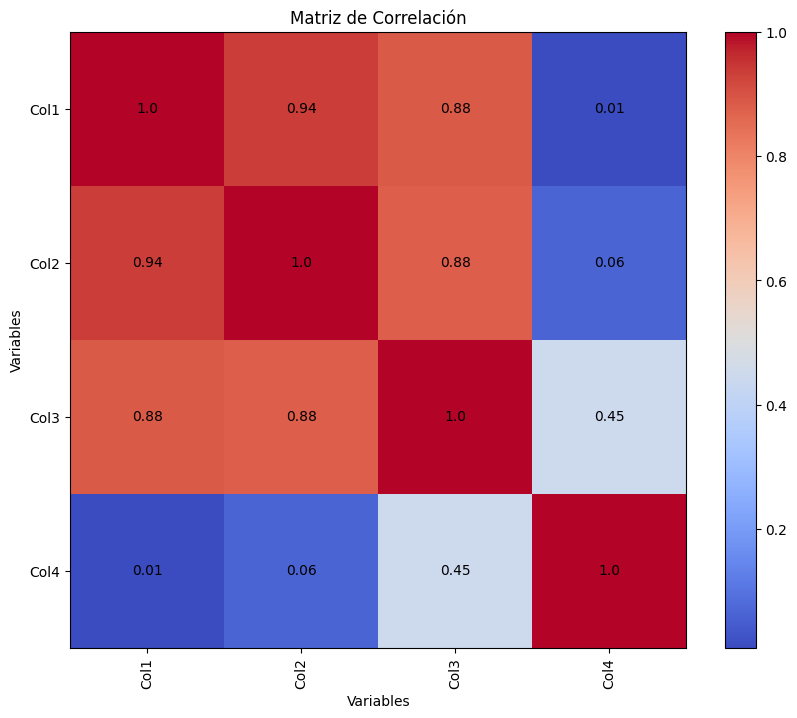

In [273]:
## Llamada
visualizar_matriz_correlacion(df)

<br/>

### - **Información Mutua:**
Se pasa como argumento el dataframe y la funcion se encargará de obtener los resultados (llamando a calcular_info_mutua()) y de realizar el plot.

In [ ]:
def visualizar_infmutua(datos):
    """
    Visualiza la matriz de información mutua para un dataframe.
    Se hace uso de función calcular_info_mutua() para obtener los datos y asi poder realizar el plot.

    Args:
    datos (pandas.DataFrame): Un DataFrame que contiene las variables para las cuales se calculará la información mutua.
    """

    # Calcular la matriz de informacion mutua
    matriz_info = calcular_info_mutua(datos)

    # Configura el tamaño de la figura
    plt.figure(figsize=(10, 8))

    # Crea un mapa de calor para visualizar la matriz de correlaciones
    plt.imshow(matriz_info, interpolation='nearest', cmap='coolwarm')
    plt.colorbar()

    # Etiquetas de los ejes
    num_variables = len(matriz_info.columns)
    plt.xticks(range(num_variables), matriz_info.columns, rotation=90)
    plt.yticks(range(num_variables), matriz_info.columns)

    # Muestra el valor de correlación en cada celda
    for i in range(num_variables):
        for j in range(num_variables):
            plt.text(i, j, round(matriz_info.iloc[i, j], 2), ha='center', va='center', color='black')

    # Título y etiquetas de los ejes
    plt.title('Matriz de Informacion Mutua')
    plt.xlabel('Variables')
    plt.ylabel('Variables')

    # Muestra la matriz de correlaciones
    plt.show()

### <u>Caso de uso:</u> Visualizar Información Mutua

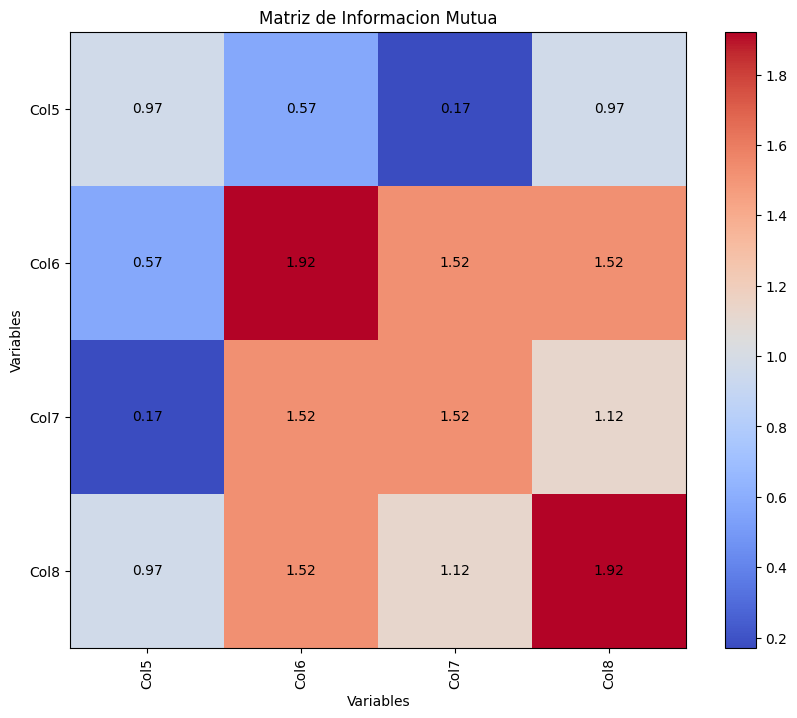

In [ ]:
# Llamada
visualizar_infmutua(df)

### - **AUC-ROC:**
A diferencia de las otras dos visualizaciones, en este caso no se pasa como argumento el dataframe, sino la lista de FPR y TPR.

De este modo, se visualiza para una variable y la etiqueta correspondiente.

In [ ]:
def visualizar_roc(fpr_list, tpr_list):
  """
    Visualiza una curva AUC-ROC utilizando las tasas de falsos positivos (FPR)
    y verdaderos positivos (TPR) proporcionadas.

    Args:
    - fpr_list (list): Lista de tasas de falsos positivos.
    - tpr_list (list): Lista de tasas de verdaderos positivos.
    Los dos argumentos deben de tener la misma longitud
  """

  plt.figure(figsize=(8, 6))
  plt.plot(fpr_list, tpr_list, color='blue', lw=2, label='Curva ROC')
  plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Línea de referencia')
  plt.xlabel('Tasa de Falsos Positivos (FPR)')
  plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
  plt.title('Curva ROC')
  plt.legend()
  plt.grid(True)
  plt.show()

### <u>Caso de uso:</u> Visualizar Información Mutua

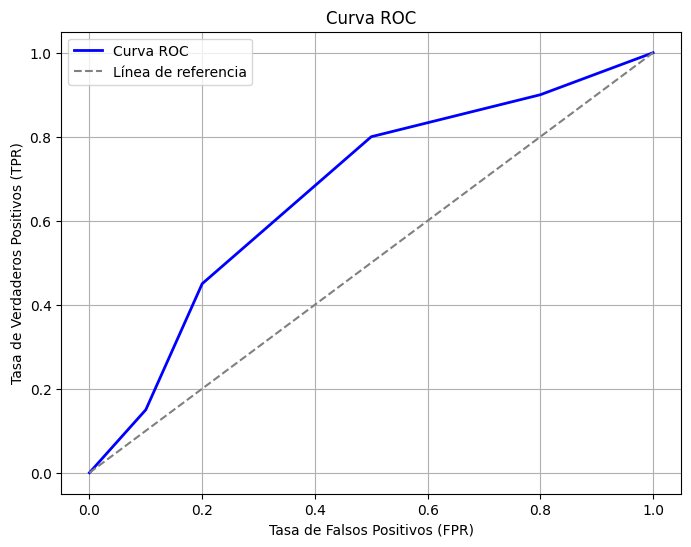

In [ ]:
fpr_list = [0, 0.1, 0.2, 0.5, 0.8, 1]
tpr_list = [0, 0.15, 0.45, 0.8, 0.9, 1]
visualizar_roc(fpr_list, tpr_list)